<a href="https://colab.research.google.com/github/de-fernandez/CPE-311-CPE22S3/blob/main/Don_Eleazar_T_Fernandez%2C_CPE22S3%2C_CPE_311_(Seatwork_6_1_Reviewing_Data_Analysis_Tools).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1> Seatwork 6.1 Reviewing Data Analysis Tools </H1>

<h2> 1. Given the following data structures: </h2>

In [1]:
!pip install pandas

A. Create a DataFrame with the data above

B. What is the name of the first column?

C. Sort the DataFrame by city in descending order (check the documentation for sort)

D. Which customer is in the last row of the DataFrame?

E. Reorder the columns with customer in the first column

A. Create a DataFrame with the data above

In [20]:
import pandas as pd

Data = {
    "sales": [100,130,119,92,35],
    "customer_account": ['B100','J101','X102','P103','R104'],
    "city": ['BOS','LA','NYC','SF','CHI']
    }
Dataframe = pd.DataFrame(Data)

print(Dataframe)

   sales customer_account city
0    100             B100  BOS
1    130             J101   LA
2    119             X102  NYC
3     92             P103   SF
4     35             R104  CHI


B. What is the name of the first column?

Answer: The name of the first column is "sales".

C. Sort the DataFrame by city in descending order (check the documentation for sort)

In [19]:
Dataframe_Sorted = Dataframe.sort_values(by = "sales", ascending = False)
print(Dataframe_Sorted)

   sales customer_account city
1    130             J101   LA
2    119             X102  NYC
0    100             B100  BOS
3     92             P103   SF
4     35             R104  CHI


D. Which customer is in the last row of the DataFrame?

Answer: The customer in the last row of the DataFrame is "R104".

E. Reorder the columns with customer in the first column

In [22]:
Dataframe_Order = pd.DataFrame(data = Dataframe, columns = ["customer_account", "sales", "city"])
print(Dataframe_Order)

  customer_account  sales city
0             B100    100  BOS
1             J101    130   LA
2             X102    119  NYC
3             P103     92   SF
4             R104     35  CHI


<h2> 2. Load the Titanic Dataset Download Titanic Datasetand answer the following questions: </h2>

A. What was the average age of the survivors?

B. What was the combined survival rate of both children (age less than 18) and seniors (age greater than 60)?

C. Group by pClass and investigate average survival rate, age and fare

D. Create a CSV with the names and ages of the survivors and another CSV file with the names and ages of the deceased.


In [23]:
from google.colab import files
upload = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [47]:
data = pd.read_csv("Titanic-Dataset.csv")
dframe = pd.DataFrame(data)
dframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


A. What was the average age of the survivors?

In [59]:
dframe_Survived = dframe.loc[dframe["Survived"] == 1]
dframe_Age = dframe_Survived["Age"].mean()
print(dframe_Age)

28.343689655172415


B. What was the combined survival rate of both children (age less than 18) and seniors (age greater than 60)?

In [83]:
dframe_Children = dframe.loc[dframe["Age"] <= 18]
dframe_Adult = dframe.loc[dframe["Age"] >= 60]

dframe_CAge = dframe_Children["Survived"].mean()
dframe_AAge = dframe_Adult["Survived"].mean()

dframe_Total = dframe_CAge + dframe_AAge
print(dframe_Total)

0.7728278915329274


C. Group by pClass and investigate average survival rate, age and fare

In [82]:
dframe0 = dframe.groupby("Pclass")["Survived"].mean()
dframe1 = dframe.groupby("Pclass")["Age"].mean()
dframe2 = dframe.groupby("Pclass")["Fare"].mean()

dframe_Groupby = pd.concat([dframe0, dframe1, dframe2 ], axis = 1)
dframe_Groupby

,Survived,Age,Fare
Pclass,,,
1,0.629630,38.233441,84.154687
2,0.472826,29.877630,20.662183
3,0.242363,25.140620,13.675550


D. Create a CSV with the names and ages of the survivors and another CSV file with the names and ages of the deceased.

In [91]:
Survivors = dframe[dframe.Survived == 1]
Survivors[["Name", "Age"]].to_csv("dframe_Survivors.csv")

Deceased = dframe[dframe.Survived == 0]
Deceased[["Name", "Age"]].to_csv("dframe_Deceased.csv")

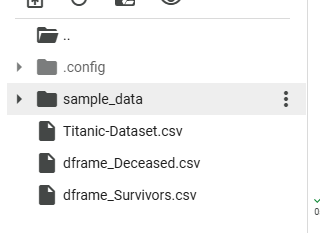